In [6]:
# Configure the integration and enable interactive mode
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# qubit_spec_20230801

Resonance spectroscopy: invio segnale a freq diverse. se segnale e freq a caso passa qubit indisturbato. se invece va risonanza col risonatore prende energia dal segnale, allora avrò picco verso il basso.

Risonatore 2d ha due risonatori che vede passagio di fotoni da una parte all'altra quando cìè risonanza.
Con rison spectroscopy si capisce ... TO BE UNDERSTOOD

qubit spectroscopy : mando segnal a canale di drive e poi mando freq caratteristica del risonatore per misurare punto piu in basso del picco.


In [3]:
# C:\Users\oper\SynologyDrive\Lab2023\Qubit\data\qubit_spectroscopy\qubit_spec_20230801\data\qubit spectroscopy_0\data.npz

file = np.load("C:\\Users\\fsfinardi\\Documents\\01_Personali\\Università-2324\\LabCrio\\data\\qubit_spectroscopy\\qubit_spec_20230801\\data\\qubit spectroscopy_0\\data.npz")
# file = np.load("C:\\Users\\oper\\SynologyDrive\\Lab2023\\Qubit\\data\\qubit_spectroscopy\\qubit_spec_20230801\\data\\qubit spectroscopy_0\\data.npz")
print(file.files)

['D1', 'D2', 'D3']


In [4]:
D1 = file['D1']
D2 = file['D2']
D3 = file['D3']

print(D1.dtype)
D1_freq = D1['freq']
D1_msr = D1['msr']
D1_phase = D1['phase']

[('freq', '<f8'), ('msr', '<f8'), ('phase', '<f8')]


## Qubit_D1 - Frequency vs MSR

Qui misuro risonatore accoppiato a uno dei due stati, in funzione della freq inviata  al Qubit. Ricordarsi SHIFT DEL RISONATORE

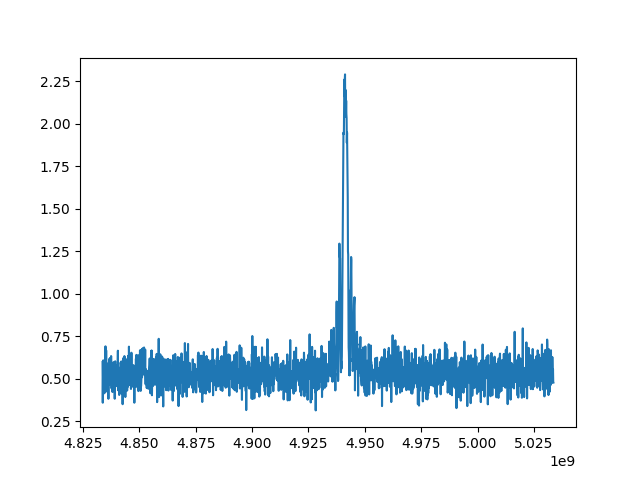

In [8]:
fig = plt.figure()
plt.plot(D1_freq, D1_msr)

## Qubit_D1 - Frequency vs Phase

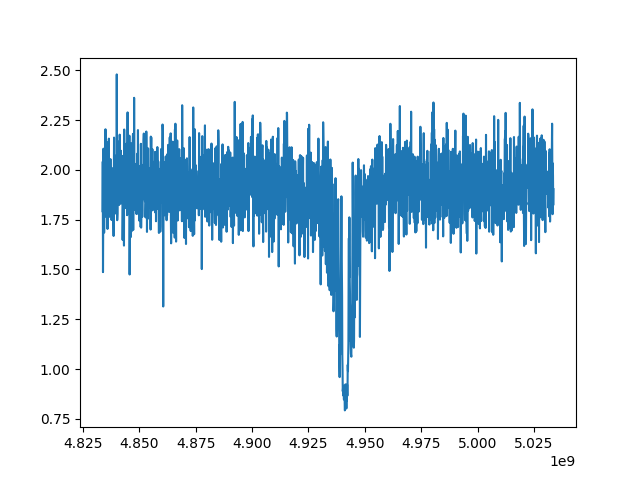

In [9]:
fig = plt.figure()
plt.plot(D1_freq, D1_phase)

## Moving Avarage

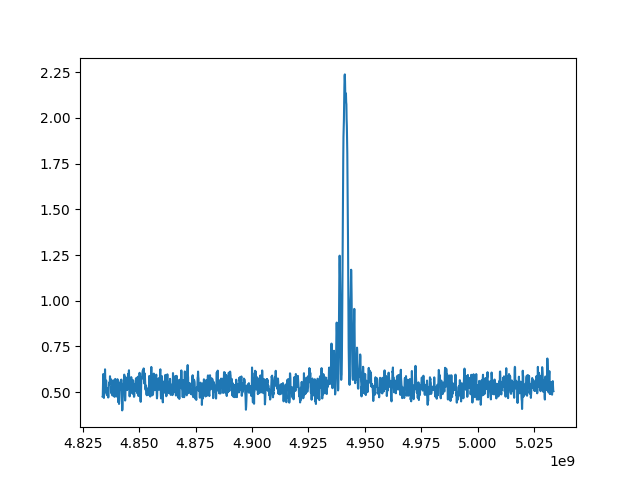

In [17]:

window_size = 3
a = int((window_size-1)/2)

# Convert array of integers to pandas series
numbers_series = pd.Series(D1_msr)

# Get the window of series
# of observations of specified window size
windows = numbers_series.rolling(window_size)

# Create a series of moving
# averages of each window
moving_averages = windows.mean()

# Convert pandas series back to list
moving_averages_list = moving_averages.tolist()

# Remove null entries from the list
D1_msr_avg = moving_averages_list[window_size - 1:]
D1_freq_cut = D1_freq[a:-a]

fig = plt.figure()
plt.plot(D1_freq_cut, D1_msr_avg)

## Setting the initial values for the fit

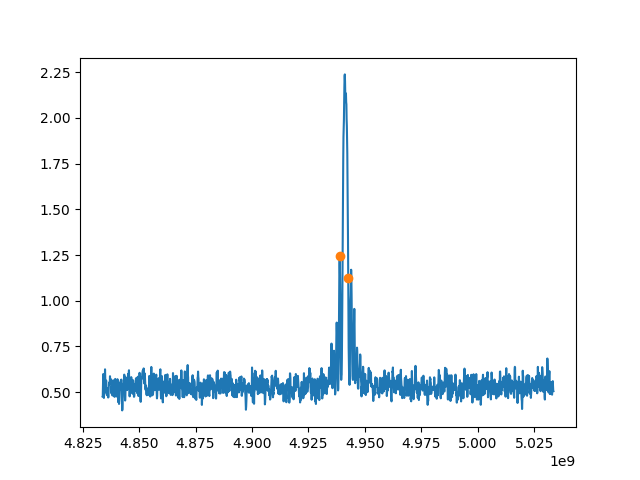

Minimum: 0.40036485233466035
Maximum: 2.2385056480772256
f peak: 4941124214.0
Gamma: 0.0038


In [11]:
D1_min = min(D1_msr_avg)
D1_max = max(D1_msr_avg)
idx_max = D1_msr_avg.index(max(D1_msr_avg))
D1_peak = D1_freq_cut[idx_max]


half_height = (D1_max + D1_min)/2

argMax = np.argmax(D1_msr_avg)
idx_L = np.argmin(np.abs(half_height - np.array(D1_msr_avg[:argMax])))
idx_R = np.argmin(np.abs(half_height - np.array(D1_msr_avg[argMax:]))) + idx_max + 1

fig = plt.figure()
plt.plot(D1_freq_cut, D1_msr_avg)
plt.plot([D1_freq_cut[idx_L],D1_freq_cut[idx_R]], [D1_msr_avg[idx_L],D1_msr_avg[idx_R]], ls = 'none', marker = 'o')

D1_gamma = D1_freq_cut[idx_R] - D1_freq_cut[idx_L]
plt.show()

print('Minimum:', D1_min)
print('Maximum:', D1_max)
print('f peak:', D1_peak)
print('Gamma:', D1_gamma/1e9)


## Fit with "best" parameters found

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 62.32 (χ²/ndof = 0.3)      │              Nfcn = 204              │
│ EDM = 2.41e+18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

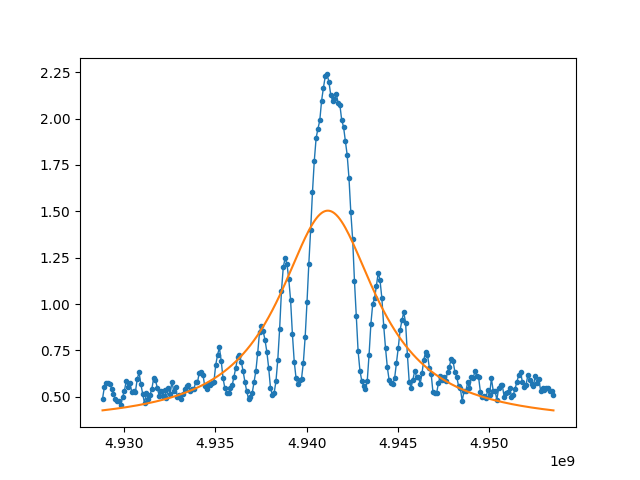

In [12]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def Lorentzian(x, p):
    return p[0] / (1 + ((x - p[1])/p[2])**2) + p[3]

x = D1_freq_cut[950:-800]
y = D1_msr_avg[950:-800]

cost = LeastSquares(x, y, 0.5, Lorentzian)
# Amplitude, x0, Gamma, Minimum
par = [D1_max, D1_peak, D1_gamma, D1_min]

m = Minuit(cost, par)
result = m.migrad()

print(result)

par_opt = [result.values[f'x{i}'] for i in range(len(result.values))]
fig = plt.figure()
plt.plot(x, y, marker = '.', linewidth = 1)   
plt.plot(x, Lorentzian(x, par_opt))



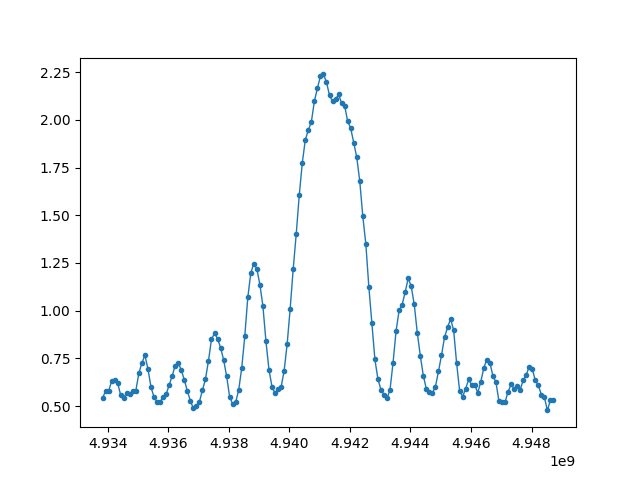

In [13]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

# def Lorentzian(x, p):
#     return p[0] / (1 + ((x - p[1])/p[2])**2) + p[3]


cut_left = 1000
cut_right = 1150
x = D1_freq_cut[cut_left:cut_right]
y = D1_msr_avg[cut_left:cut_right]



# cost = LeastSquares(x, y, 0.5, Lorentzian)
# # Amplitude, x0, Gamma, Minimum
# par = [D1_max, D1_peak, D1_gamma, D1_min]

# m = Minuit(cost, par)
# result = m.migrad()

# print(result)

# par_opt = [result.values[f'x{i}'] for i in range(len(result.values))]
fig = plt.figure()
plt.plot(x, y, marker = '.', linewidth = 1)   
# plt.plot(x, Lorentzian(x, par_opt))


2.2385056480772256


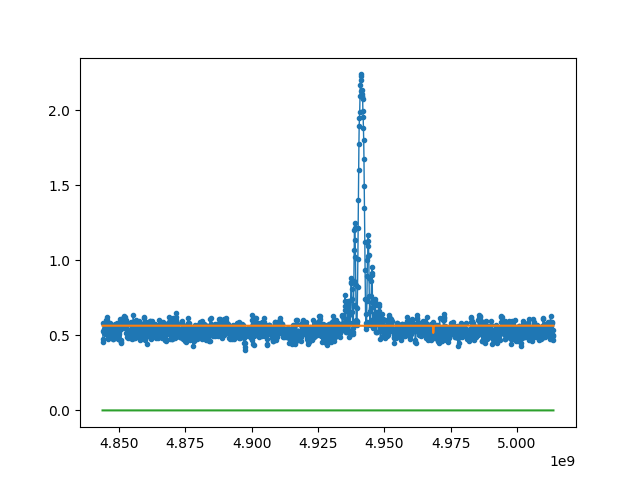

In [21]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

def Sinc(x, p):
    return p[0]*(np.sinc(x - p[1])**2) + p[2]

cut_left = 100
cut_right = 1800
x = D1_freq_cut[cut_left:cut_right]
y = D1_msr_avg[cut_left:cut_right]

cost = LeastSquares(x, y, 0.1, Sinc)
# Amplitude, x0, Gamma, Minimum


sinc_period = 1.75e6
sinc_shift = 4.938e9

par = [1.75e6, D1_peak, 0.5]

print(D1_max)

m = Minuit(cost, par)
result = m.migrad()

# print(result)

par_opt = [result.values[f'x{i}'] for i in range(len(result.values))]

fig = plt.figure()
plt.plot(x, y, marker = '.', linewidth = 1)   
plt.plot(x, Sinc(x, par_opt))
plt.plot(x, np.sinc(x-4.941e9))

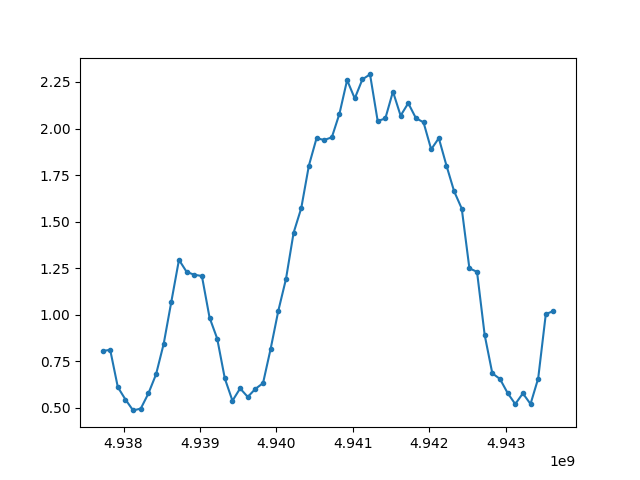

In [15]:
cut_left = 1040
cut_right = cut_left + 60

fig = plt.figure()
plt.plot(D1_freq[cut_left:cut_right], D1_msr[cut_left:cut_right], marker = '.')
     

TROVARE METODO GRAFICI CON INTERFACCIA SU CUI SI PUO' ZOOMMARE E SPOSTARSI!!